In [9]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-methodlines-heatBE)

Now we apply backward Euler to the heat equation. Mathematically this means multiplying by the *inverse* of a matrix, but we interpret that numerically as a linear system solution. We will reuse the setup from {numref}`Demo {number} <demo-methodlines-heatFE>`.

In [10]:
m = 100
x, Dx, Dxx = FNC.diffper(m, [0, 1])
tfinal = 0.15  
n = 2400                 # number of time steps  
tau = tfinal / n         # time step
t = tau * arange(n+1)    # time values
U = zeros([m, n+1])
U[:, 0] = exp(-60 * (x - 0.5) ** 2)

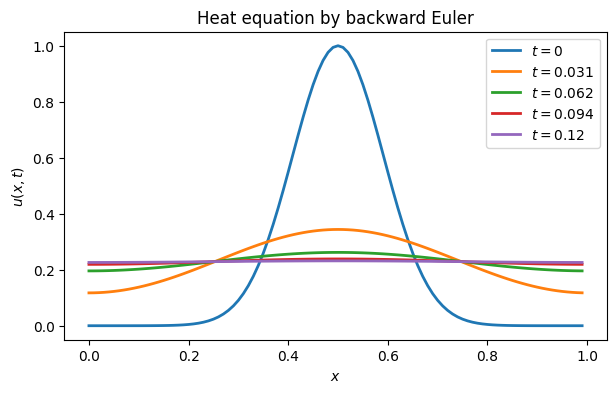

In [11]:
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
B = sp.csr_matrix(sp.eye(m) - tau * Dxx)
for j in range(n):
    U[:, j + 1] = spsolve(B, U[:, j])

plot(x, U[:, ::500])
xlabel("$x$")
ylabel("$u(x,t)$")
legend([f"$t={tj:.2g}$" for tj in t[::500]])
title("Heat equation by backward Euler");

In [13]:
from matplotlib.animation import FuncAnimation
fig = figure()
ax = fig.add_subplot(autoscale_on=False, xlim=(0, 1), ylim=(-0.25, 1))
ax.grid()

line, = ax.plot([], [], '-', lw=2)
ax.set_title("Backward Euler")
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def snapshot(j):
    line.set_data(x, U[:, j])
    time_text.set_text(f"t = {t[j]:.2e}")
    return line, time_text

anim = FuncAnimation(fig, snapshot, frames=range(0, n+1, 10), blit=True)
anim.save("diffusionBE.mp4", fps=30)
close()

This solution looks physically plausible, as the large concentration in the center diffuses outward until the solution is essentially constant. Observe that the solution remains periodic in space for all time.